Can archive.

In [1]:
import datetime as dt

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import ndimage
import xarray as xr

from remake import load_remake

from mcs_prime import PATHS
%matplotlib inline

In [2]:
# Load some ERA5 u, v, q data.
year = 2020
month = 1
day = 11
e5datadir = PATHS['era5dir'] / f'data/oper/an_ml/{year}/{month:02d}/{day:02d}'

In [3]:
h = 6

e5time = dt.datetime(year, month, day, h, 0)
e5paths = [e5datadir / (f'ecmwf-era5_oper_an_ml_{t.year}{t.month:02d}{t.day:02d}'
                         f'{t.hour:02d}00.{var}.nc')
            for var in ['q']
            for t in [e5time]]

In [4]:
e5 = (xr.open_mfdataset(e5paths).sel(latitude=slice(60, -60))
      .mean(dim='time').load())

In [5]:
q = e5.q.values

(137.0, 0.0)

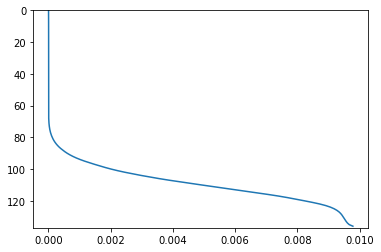

In [8]:
plt.plot(q.mean(axis=(1, 2)), range(q.shape[0]))
plt.ylim((137, 0))